In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log
from scipy.interpolate import interp1d
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sage.plot.plot3d.parametric_surface import ParametricSurface
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import fsolve
from sympy import symbols, Eq, solve

In [2]:
import requests

climate_api = "https://api.mosqlimate.org/api/datastore/climate/"

page = 1 # total amount of pages is returned in the request
per_page = 100
pagination = f"?page={page}&per_page={per_page}&"
filters = "start=%s&end=%s" % ("2017-01-01", "2021-12-31")

resp = requests.get(climate_api + pagination + filters)

# Or you can add a geocode to the filters
geocode = 1302603
resp = requests.get(
    climate_api + 
    pagination + 
    filters +
    f"&geocode={geocode}"
)

items = resp.json()["items"] # JSON data in dict format
#total_items = resp.json()["total_items"] # JSON data in dict format
resp.json()["pagination"] # Pagination*

{'items': 100,
 'total_items': 1826,
 'page': 1,
 'total_pages': 19,
 'per_page': 100}

In [3]:
df = pd.DataFrame(items)
df

,date,geocodigo,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressao_min,pressao_med,pressao_max,umid_min,umid_med,umid_max
0,2017-01-01,1302603,23.6111,25.3502,27.7248,0.1231,0.5659,1.3036,4.5273,0.9960,0.9983,1.0013,79.6839,90.0431,99.0368
1,2017-01-02,1302603,24.0199,26.1471,29.4771,0.0000,0.2304,1.6464,1.8431,0.9945,0.9979,1.0004,72.0835,87.2796,97.3930
2,2017-01-03,1302603,23.1482,25.8223,29.4092,0.0140,0.9063,3.2519,7.2501,0.9935,0.9974,0.9997,67.4282,84.7726,93.5927
3,2017-01-04,1302603,24.4720,26.4360,28.7671,0.0000,0.2244,0.5448,1.7950,0.9929,0.9965,0.9996,73.6756,84.6681,93.5752
4,2017-01-05,1302603,24.0013,26.6296,30.2719,0.0022,0.3966,1.6309,3.1725,0.9935,0.9962,0.9990,67.6898,83.8311,93.7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-04-06,1302603,24.1933,25.9811,27.8978,0.0022,0.3656,1.2173,2.9252,0.9959,0.9991,1.0014,79.5860,88.1609,94.4391
96,2017-04-07,1302603,23.9427,26.3988,30.3345,0.0535,0.2279,0.4623,1.8230,0.9942,0.9977,1.0000,72.9401,87.4330,97.2660
97,2017-04-08,1302603,24.3814,25.7652,27.3958,0.0003,0.3098,1.0608,2.4787,0.9936,0.9969,0.9994,79.9364,87.5490,96.0499
98,2017-04-09,1302603,23.9278,26.3449,29.6006,0.0014,0.2418,0.8104,1.9343,0.9933,0.9965,0.9989,70.0808,85.5653,96.2795


In [4]:
#### Getting the full data:

pages = np.arange(1, 20) # total amount of pages is returned in the request
per_page = 100
for page in pages:
    pagination = f"?page={page}&per_page={per_page}&"
    filters = "start=%s&end=%s" % ("2017-01-01", "2021-12-31")

    resp = requests.get(climate_api + pagination + filters)

# Or you can add a geocode to the filters
geocode = 1302603
resp = requests.get(
    climate_api + 
    pagination + 
    filters +
    f"&geocode={geocode}"
)

items = resp.json()["items"] # JSON data in dict format
#total_items = resp.json()["total_items"] # JSON data in dict format
resp.json()["pagination"] # Pagination*

{'items': 26,
 'total_items': 1826,
 'page': 19,
 'total_pages': 19,
 'per_page': 100}

In [9]:
total_pages = 19 
start_date = "2017-01-01"
end_date = "2021-12-31"
geocode = 1302603

all_items = []  # List to store all items

# Loop through each page
for page in range(1, total_pages + 1):
    pagination = f"?page={page}&per_page={per_page}&"
    filters = f"start={start_date}&end={end_date}&geocode={geocode}"
    
    resp = requests.get(climate_api + pagination + filters)
    
    # Check if the request was successful
    if resp.status_code == 200:
        items = resp.json().get("items", [])  # Get items, default to an empty list if key not found
        all_items.extend(items)  # Append the items from this page to the list
    else:
        print(f"Failed to retrieve data for page {page}")
        break  # Break the loop in case of a failed request

df = pd.DataFrame(all_items)
df

,date,geocodigo,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressao_min,pressao_med,pressao_max,umid_min,umid_med,umid_max
0,2017-01-01,1302603,23.6111,25.3502,27.7248,0.1231,0.5659,1.3036,4.5273,0.9960,0.9983,1.0013,79.6839,90.0431,99.0368
1,2017-01-02,1302603,24.0199,26.1471,29.4771,0.0000,0.2304,1.6464,1.8431,0.9945,0.9979,1.0004,72.0835,87.2796,97.3930
2,2017-01-03,1302603,23.1482,25.8223,29.4092,0.0140,0.9063,3.2519,7.2501,0.9935,0.9974,0.9997,67.4282,84.7726,93.5927
3,2017-01-04,1302603,24.4720,26.4360,28.7671,0.0000,0.2244,0.5448,1.7950,0.9929,0.9965,0.9996,73.6756,84.6681,93.5752
4,2017-01-05,1302603,24.0013,26.6296,30.2719,0.0022,0.3966,1.6309,3.1725,0.9935,0.9962,0.9990,67.6898,83.8311,93.7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,1302603,23.9273,25.7716,27.6912,0.0000,0.6288,2.7231,5.0304,0.9945,0.9964,0.9992,86.0339,89.9206,93.5145
1822,2021-12-28,1302603,22.9484,25.9423,31.5794,0.0003,0.1879,1.2172,1.5033,0.9945,0.9967,0.9993,65.6959,85.8707,96.1019
1823,2021-12-29,1302603,24.7293,27.4349,31.0417,0.0000,0.0930,0.6209,0.7437,0.9939,0.9969,0.9985,66.3288,82.4274,93.6948
1824,2021-12-30,1302603,24.3319,25.5776,27.5484,0.0000,1.2250,5.8845,9.8002,0.9956,0.9970,0.9986,81.8586,90.1047,93.3572


In [10]:
# Saves the dataframe as a separate csv file to be used in different modules
df.to_csv('climate_api_data_2017_2021.csv', index=False)

In [11]:
datetime_df = pd.DataFrame()
datetime_df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
datetime_df['year'] = datetime_df['date'].dt.year

# Count the occurrences of each year
year_counts = datetime_df['year'].value_counts().sort_index()

print(year_counts)

2017    365
2018    365
2019    365
2020    366
2021    365
Name: year, dtype: int64


In [12]:
#### Article parameters:

T_prime=19.9

T1= 26.4 
T2= 0.025
omega1= 0.017
phi1= -1.45

R1= 250.083 
R2= 0.565
omega2= 0.02
phi2=1.6

B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.04
A=-0.03
B=1.31
C=-4.4
b2=0.09
tau_H=10
DD=105
Tmin=14.5
gamma= 1/120
R_L = 50
N=8558
M= 10000  #0
E_M0=1 #0 # None
I_H0=1 
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0
S_M0 = M - E_M0

# Defining the functions of temperature and precipitation
#def T(t):
#        return T1 * (1 + T2 * cos(omega1 * t - phi1))

#def R(t):
#        return R1 * (1 + R2 * cos(omega2 * t - phi2))

In [13]:
def Temp():
    return df['temp_med']

def Rain():
    return df['precip_med']

In [14]:
Temp()

0       25.3502
1       26.1471
2       25.8223
3       26.4360
4       26.6296
         ...   
1821    25.7716
1822    25.9423
1823    27.4349
1824    25.5776
1825    26.0083
Name: temp_med, Length: 1826, dtype: float64

In [15]:
Rain()

0       0.5659
1       0.2304
2       0.9063
3       0.2244
4       0.3966
         ...  
1821    0.6288
1822    0.1879
1823    0.0930
1824    1.2250
1825    0.3746
Name: precip_med, Length: 1826, dtype: float64

In [16]:
def original_model(t, z, df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0):
    
    S_H, I_H, R_H, S_M, E_M, I_M = z
    
#     Temperature and rain functions
#     def Temp(t):
#         return T1 * (1 + T2 * cos(omega1 * t - phi1))

#     def Rain(t):
#         return R1 * (1 + R2 * cos(omega2 * t - phi2))

#     R_curr = Rain(t)
#     T_curr = Temp(t)
    
    # Get the closest integer day to use for indexing
    day_index = int(t)  

    if day_index >= len(df):
        day_index = len(df) - 1  # To avoid out-of-bounds issues
    
    T_curr = df.loc[day_index, 'temp_med']
    R_curr = df.loc[day_index, 'precip_med']
    
    # Duration of larval development phase
    def tau_L(Temp):
        return 1 / (c1 * Temp + c2)
    
    # Daily survival rate of mosquitoes
    def p(Temp):
        return np.exp(-1 / (A * Temp**2 + B * Temp + C))
    
    # Larval survival probability dependent on temperature and rain
    def p_LT(Temp):
        return np.exp(-(c1 * Temp + c2))
    
    def p_LR(Rain):
        return (4 * p_ML / R_L**2) * Rain * (R_L - Rain)
    
    def p_LRT(Rain, Temp):
        return p_LR(Rain) * p_LT(Temp)
    
    # Egg and pupa survival probability dependent on rain
    def p_ER(Rain):
        return (4 * p_ME / R_L**2) * Rain * (R_L - Rain)
    
    def p_PR(Rain):
        return (4 * p_MP / R_L**2) * Rain * (R_L - Rain)

    # Duration of the sporogonic cycle
    def tau_M(Temp):
        return DD / (Temp - Tmin)
    
    tau_M_curr = tau_M(T_curr)

    # Defining the mosquito survival function
    def l_tau_M(tau_M, Temp):  
        p_T = p(Temp)
        return p_T**tau_M
    
    l_curr = l_tau_M(tau_M_curr, T_curr)

    # Defining the mosquito mortality rate
    def mu(Temp):
        return -np.log(p(Temp))
    
    mu_curr = mu(T_curr)
    
    # Calculate the biting rate and transmission probability
    def a(Temp):
        return (Temp - T_prime) / D1
    
    a_curr = a(T_curr)
    
    def b(Rain, Temp):
        return B_E * p_ER(Rain) * p_LRT(Rain, Temp) * p_PR(Rain) / (tau_E + tau_L(Temp) + tau_P)
    
    b_curr = b(R_curr, T_curr)
    
    dShdt = -a_curr * b2 * (I_M0 / N) * S_H
    dIhdt = a_curr * b2 * (I_M0 / N) * S_H - gamma * I_H
    dRhdt = gamma * I_H
    
    dSmdt = b_curr - a_curr * b1 * (I_H0 / N) * S_M - mu_curr * S_M
    dEmdt = a_curr * b1 * (I_H0 / N) * S_M - mu_curr * E_M - a_curr * b1 * (I_H0 / N) * S_M * l_curr
    dImdt = a_curr * b1 * (I_H0 / N) * S_M * l_curr - mu_curr * I_M
    
    return [dShdt, dIhdt, dRhdt, dSmdt, dEmdt, dImdt]

In [17]:
args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

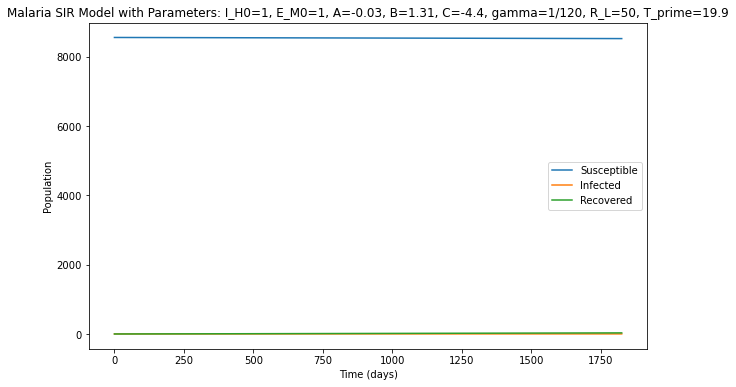

In [18]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

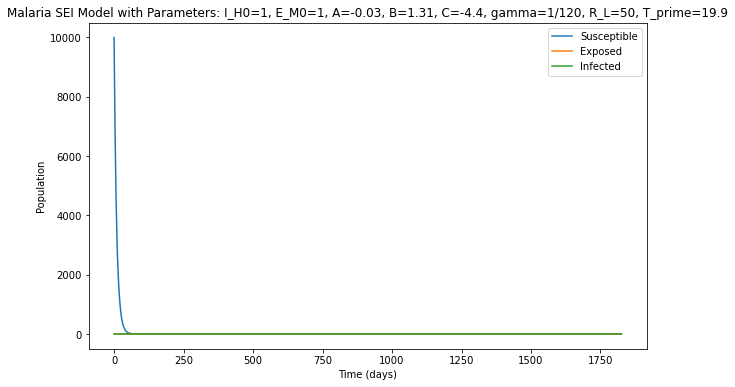

In [19]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Susceptible')
plt.plot(times, E_M, label='Exposed')
plt.plot(times, I_M, label='Infected')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SEI Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [20]:
R_L = 450

In [21]:
args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

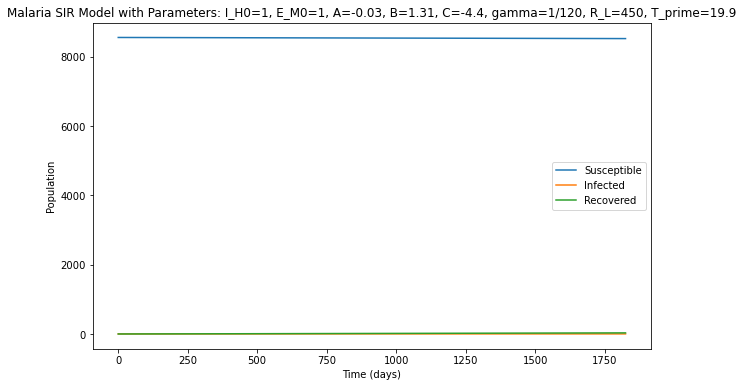

In [22]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

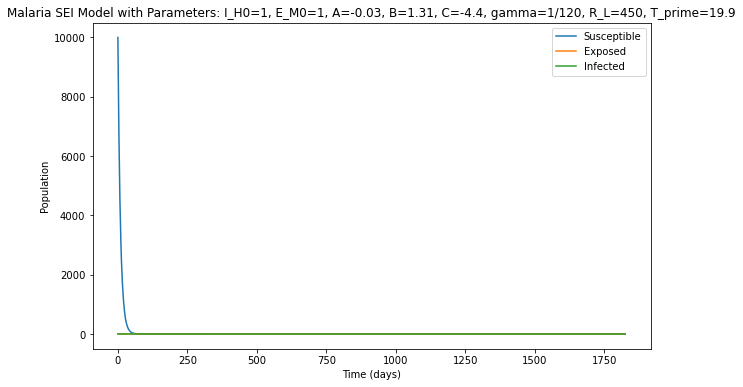

In [23]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Susceptible')
plt.plot(times, E_M, label='Exposed')
plt.plot(times, I_M, label='Infected')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SEI Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [24]:
E_M0=5000 #0 # None
I_H0=1000

S_H0 = N - I_H0
S_M0 = M - E_M0

args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

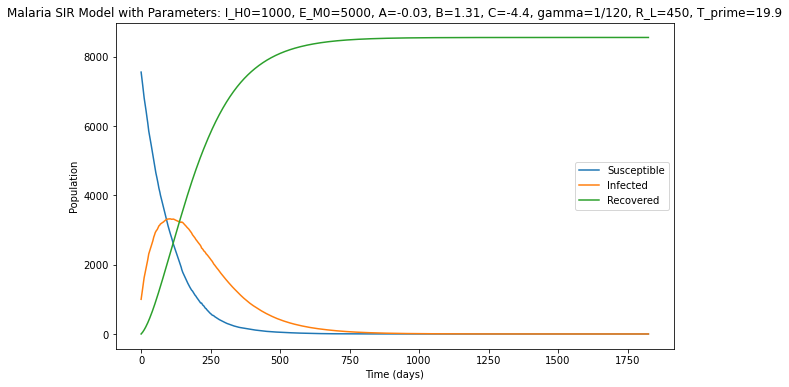

In [25]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

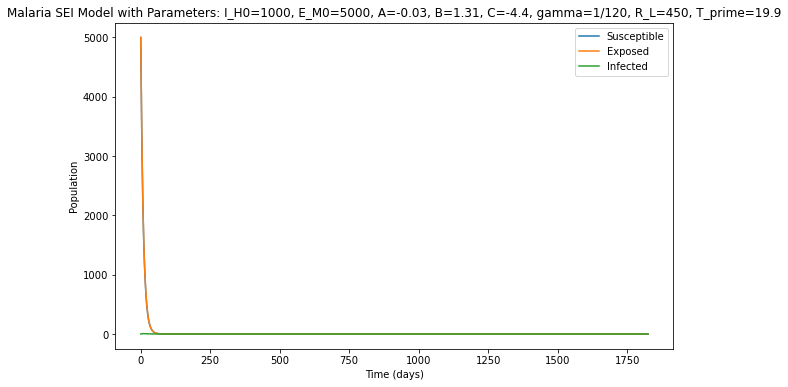

In [26]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Susceptible')
plt.plot(times, E_M, label='Exposed')
plt.plot(times, I_M, label='Infected')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SEI Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [27]:
E_M0=1
I_H0=1

S_H0 = N - I_H0
S_M0 = M - E_M0

A = 12.5
B = 15.0
C = -48.78

args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

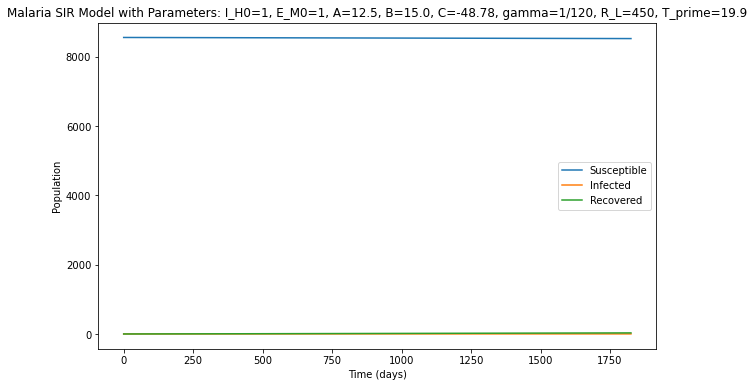

In [28]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [29]:
T_prime = 25.6

args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

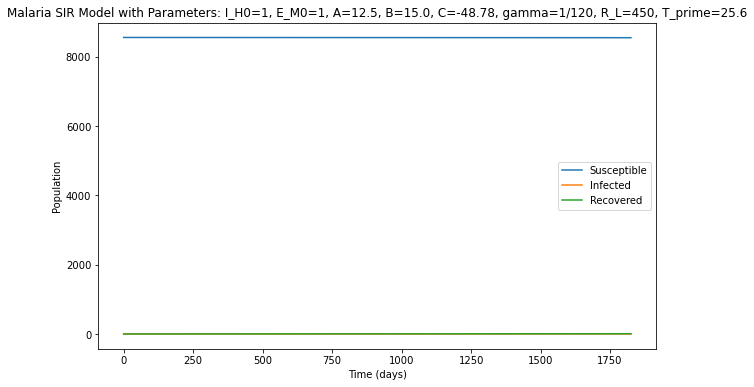

In [30]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [31]:
E_M0=5000 #0 # None
I_H0=1000

S_H0 = N - I_H0
S_M0 = M - E_M0

args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

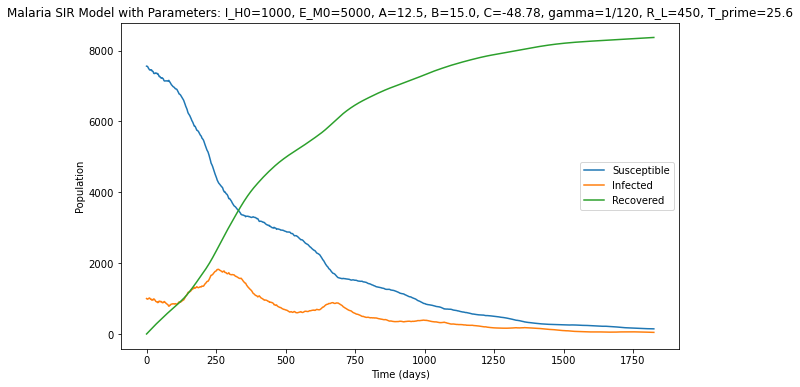

In [32]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()

In [33]:
E_M0=50000 #0 # None
I_H0=1000

S_H0 = N - I_H0
S_M0 = M - E_M0

args = (df, B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
        D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
        N, M, E_M0, I_H0)

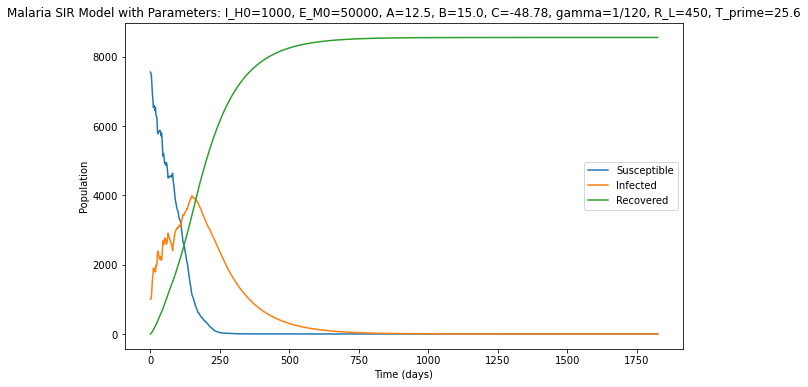

In [34]:
t_eval = np.linspace(0, 1825, 1000)  # Evaluate the solution at 1000 points between 0 and 365
sol = solve_ivp(original_model, [0, 1825], [S_H0, I_H0, 0, S_M0, E_M0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Susceptible')
plt.plot(times, I_H, label='Infected')
plt.plot(times, R_H, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title(f'Malaria SIR Model with Parameters: I_H0={I_H0}, E_M0={E_M0}, A={round(A, 2)}, B={round(B, 2)}, C={round(C, 2)}, gamma={gamma}, R_L={R_L}, T_prime={round(T_prime, 2)}')

plt.legend()

plt.show()